In [2]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("nnls")

Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'lubridate' is in use and will not be installed"
Installing package into 'C:/Users/lopes/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'nnls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lopes\AppData\Local\Temp\RtmpI3BQP6\downloaded_packages


In [23]:
library(tidyverse)
library(lubridate)
library(nnls)

In [24]:
dados = read.csv("train.csv")
head(dados)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


In [25]:
dados$datetime <- ymd_hms(dados$datetime)
head(dados)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


In [26]:
dados$year <- year(dados$datetime)
dados$month <- month(dados$datetime)
dados$day <- day(dados$datetime)
dados$hour <- hour(dados$datetime)
dados$weekday <- factor(weekdays(dados$datetime))
dados$period <- factor(cut(dados$hour, 
                   breaks = c(-1, 5, 11, 17, 23), 
                   labels = c("Madrugada", "Manhã", "Tarde", "Noite")))
dados$season <- factor(dados$season)
dados$weather <- factor(dados$weather)
head(dados)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,period
,<dttm>,<fct>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,Saturday,Madrugada
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,Saturday,Madrugada
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,Saturday,Madrugada
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,Saturday,Madrugada
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,Saturday,Madrugada
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,Saturday,Madrugada


In [27]:
#Separação entre treino e teste para a regressão
set.seed(1)
sample <- sample(c(TRUE, FALSE), nrow(dados), replace=TRUE, prob=c(0.7,0.3))
treino  <- dados[sample, ]
teste   <- dados[!sample, ]

In [28]:
validacao <- read.csv("test.csv")
head(validacao)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
4,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
6,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013


In [29]:
validacao$datetime <- ymd_hms(validacao$datetime)
head(validacao)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
4,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
6,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013


In [30]:
validacao$year <- year(validacao$datetime)
validacao$month <- month(validacao$datetime)
validacao$day <- day(validacao$datetime)
validacao$hour <- hour(validacao$datetime)
validacao$weekday <- factor(weekdays(validacao$datetime))
validacao$period <- factor(cut(validacao$hour, 
                   breaks = c(-1, 5, 11, 17, 23), 
                   labels = c("Madrugada", "Manhã", "Tarde", "Noite")))
validacao$season <- factor(validacao$season)
validacao$weather <- factor(validacao$weather)
head(validacao)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday,period
,<dttm>,<fct>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>
1,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,Thursday,Madrugada
2,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,Thursday,Madrugada
3,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,Thursday,Madrugada
4,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,Thursday,Madrugada
5,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,Thursday,Madrugada
6,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013,2011,1,20,5,Thursday,Madrugada


In [31]:
summary(treino)

    datetime                      season      holiday          workingday    
 Min.   :2011-01-01 00:00:00.00   1:1853   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:2011-07-01 17:15:00.00   2:1937   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :2012-01-02 06:00:00.00   3:1878   Median :0.00000   Median :1.0000  
 Mean   :2011-12-27 12:09:22.31   4:1912   Mean   :0.02916   Mean   :0.6844  
 3rd Qu.:2012-07-01 09:30:00.00            3rd Qu.:0.00000   3rd Qu.:1.0000  
 Max.   :2012-12-19 22:00:00.00            Max.   :1.00000   Max.   :1.0000  
                                                                             
 weather       temp           atemp          humidity        windspeed     
 1:4996   Min.   : 0.82   Min.   : 0.76   Min.   :  0.00   Min.   : 0.000  
 2:1980   1st Qu.:13.94   1st Qu.:16.66   1st Qu.: 47.00   1st Qu.: 7.002  
 3: 604   Median :20.50   Median :24.24   Median : 62.00   Median :11.001  
 4:   0   Mean   :20.23   Mean   :23.68   Mean   : 61.95   Mean   :12.63

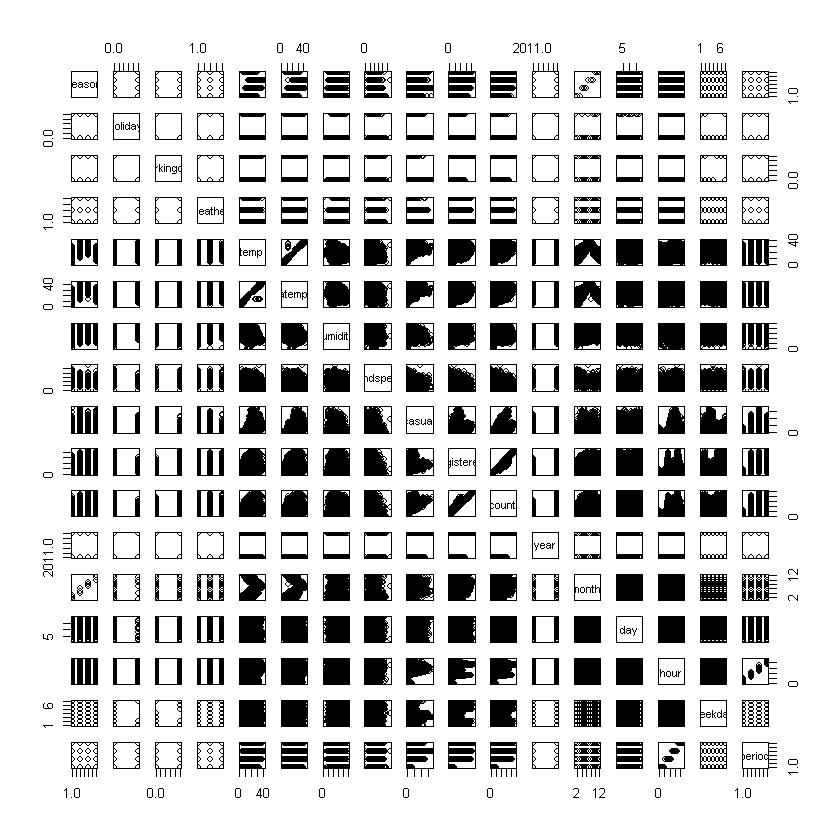

In [32]:
plot(treino[ , !(names(treino) %in% ("datetime"))])

Percebe-se que as variáveis atemp, registered, season e period são altamente correlacionadas com algumas das variáveis, sendo portanto necessária suas remoções.

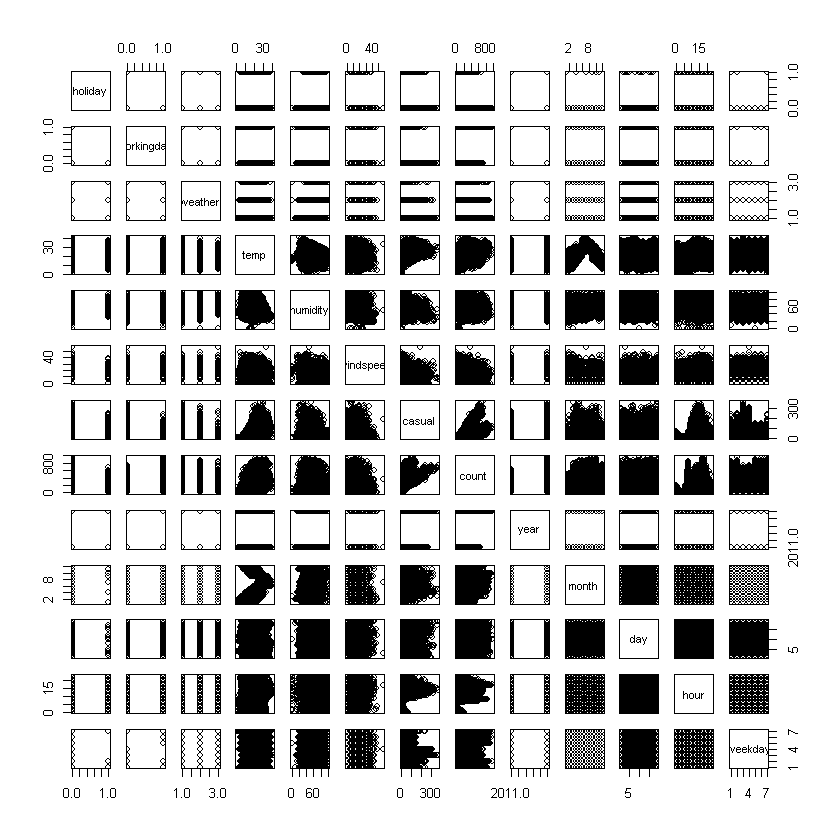

In [33]:
plot(treino[ , !(names(treino) %in% c("atemp","datetime","period","registered","season"))])

Além disso, como deseja-se prever os valores no final de cada mês, não faz sentido em utilizar a variável casual, uma vez que nesses dias são se terá a informação do número de usuários não registrados. 

In [34]:
# Treinamento do Modelo de Regressão
model = lm(count ~ ., data = treino[ , !(names(treino) %in% c("atemp","casual","datetime","period","registered","season"))])
summary(model)


Call:
lm(formula = count ~ ., data = treino[, !(names(treino) %in% 
    c("atemp", "casual", "datetime", "period", "registered", 
        "season"))])

Residuals:
    Min      1Q  Median      3Q     Max 
-316.38  -95.15  -28.23   63.38  644.28 

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.732e+05  6.697e+03 -25.866  < 2e-16 ***
holiday           5.436e+00  1.178e+01   0.462   0.6444    
workingday        1.281e+01  6.211e+00   2.063   0.0391 *  
weather2          3.176e+00  4.022e+00   0.790   0.4298    
weather3         -3.530e+01  6.773e+00  -5.212 1.92e-07 ***
temp              6.712e+00  2.242e-01  29.936  < 2e-16 ***
humidity         -1.900e+00  1.074e-01 -17.682  < 2e-16 ***
windspeed         4.576e-01  2.195e-01   2.085   0.0371 *  
year              8.613e+01  3.329e+00  25.870  < 2e-16 ***
month             7.664e+00  5.144e-01  14.900  < 2e-16 ***
day               4.409e-01  3.019e-01

In [35]:
# Treinamento do Modelo de Regressão somente com variáveis significativas
model = lm(count ~ ., data = treino[ , !(names(treino) %in% c("atemp","casual","datetime","holiday","period","registered","season"))])
summary(model)


Call:
lm(formula = count ~ ., data = treino[, !(names(treino) %in% 
    c("atemp", "casual", "datetime", "holiday", "period", "registered", 
        "season"))])

Residuals:
    Min      1Q  Median      3Q     Max 
-316.38  -95.15  -28.23   63.38  644.28 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.732e+05  6.697e+03 -25.865  < 2e-16 ***
workingday        7.379e+00  1.035e+01   0.713   0.4758    
weather2          3.176e+00  4.022e+00   0.790   0.4298    
weather3         -3.530e+01  6.773e+00  -5.212 1.92e-07 ***
temp              6.712e+00  2.242e-01  29.936  < 2e-16 ***
humidity         -1.900e+00  1.074e-01 -17.682  < 2e-16 ***
windspeed         4.576e-01  2.195e-01   2.085   0.0371 *  
year              8.613e+01  3.329e+00  25.870  < 2e-16 ***
month             7.664e+00  5.144e-01  14.900  < 2e-16 ***
day               4.409e-01  3.019e-01   1.461   0.1441    
hour              8.121e+00  2.544e-01  31.924  < 2e-16 ***
weekdayM

In [36]:
# Treinamento do Modelo de Regressão somente com variáveis significativas
model = lm(count ~ ., data = treino[ , !(names(treino) %in% c("atemp","casual","datetime","holiday","period","registered","season","workingday"))])
summary(model)


Call:
lm(formula = count ~ ., data = treino[, !(names(treino) %in% 
    c("atemp", "casual", "datetime", "holiday", "period", "registered", 
        "season", "workingday"))])

Residuals:
    Min      1Q  Median      3Q     Max 
-315.21  -95.07  -28.17   63.61  644.29 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.731e+05  6.696e+03 -25.857  < 2e-16 ***
weather2          3.156e+00  4.022e+00   0.785   0.4327    
weather3         -3.525e+01  6.772e+00  -5.205 1.99e-07 ***
temp              6.713e+00  2.242e-01  29.943  < 2e-16 ***
humidity         -1.900e+00  1.074e-01 -17.689  < 2e-16 ***
windspeed         4.553e-01  2.195e-01   2.075   0.0381 *  
year              8.609e+01  3.329e+00  25.862  < 2e-16 ***
month             7.662e+00  5.144e-01  14.896  < 2e-16 ***
day               4.458e-01  3.018e-01   1.477   0.1396    
hour              8.121e+00  2.544e-01  31.923  < 2e-16 ***
weekdayMonday    -4.700e+00  6.212e+00  -0.757   0.449

In [37]:
head(model$fitted.values)

1         2         3         5         8         9 
-94.94048 -90.42426 -82.30352 -51.05540 -58.60684 -18.57246

Como existem valores negativos, é necessário utilizar um modelo que garante que os coeficientes sejam positivos.

In [38]:
# Criar dummies para a coluna weather
dummies_weather <- model.matrix(~ weather - 1, data = treino)

# Criar dummy para o domingo
dummies_weekday <- ifelse(treino$weekday=="Sunday",1,0)

# Combinar dummies com o dataframe original
treino_dummies <- cbind(treino, dummies_weather,dummies_weekday)

# Remover as colunas originais para não ter duplicação
treino_dummies <- treino_dummies[, !names(treino_dummies) %in% c("weather","weekday")]

# Função para normalizar dados min-max
normalizar_min_max <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

X = apply(as.matrix(treino_dummies[ , !(names(treino_dummies) %in% c("atemp","casual","count","datetime","holiday","period","registered","season","weather2","weather4","weekday","workingday"))]), 2, normalizar_min_max)
head(X)
# Ajustar o modelo usando nnls para forçar coeficientes positivos
model <- nnls(X, treino_dummies$count)
print(model)

,temp,humidity,windspeed,year,month,day,hour,weather1,weather3,dummies_weekday
1,0.2244898,0.81,0,0,0,0,0.00000000,1,0,0
2,0.2040816,0.80,0,0,0,0,0.04347826,1,0,0
3,0.2040816,0.80,0,0,0,0,0.08695652,1,0,0
5,0.2244898,0.75,0,0,0,0,0.17391304,1,0,0
8,0.1836735,0.86,0,0,0,0,0.30434783,1,0,0
9,0.2244898,0.75,0,0,0,0,0.34782609,1,0,0


Nonnegative least squares model
x estimates: 164.8411 0 0 69.7078 13.31488 0 164.4377 2.183369 0 0 
residual sum-of-squares: 179912125
reason terminated: The solution has been computed sucessfully.


In [39]:
# Calcular RMSLE no treino
n <- nrow(treino_dummies)
previsoes <- X %*% coef(model)
log_diff <- log(previsoes + 1) - log(treino_dummies$count + 1)
rmsle <- sqrt(sum(log_diff^2) / n)
rmsle

[1] 1.355943

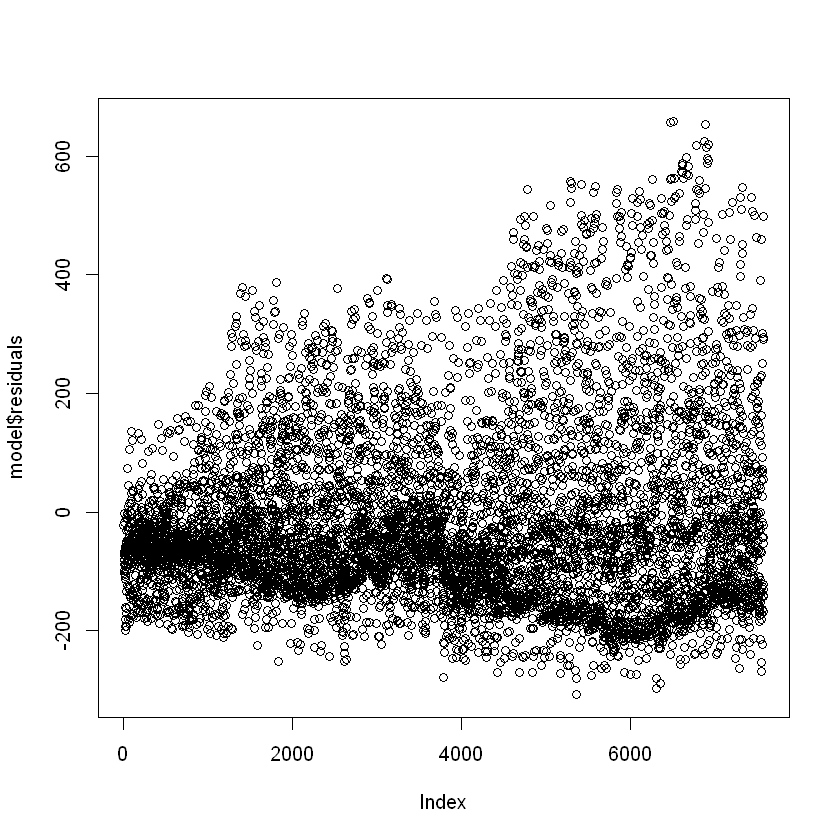

In [40]:
plot(model$residuals)

In [41]:
# Criar dummies para a coluna weather
dummies_weather <- model.matrix(~ weather - 1, data = teste)

# Criar dummy para o domingo
dummies_weekday <- ifelse(teste$weekday=="Sunday",1,0)

# Combinar dummies com o dataframe original
teste_dummies <- cbind(teste, dummies_weather,dummies_weekday)

# Remover as colunas originais para não ter duplicação
teste_dummies <- teste_dummies[, !names(teste_dummies) %in% c("weather","weekday")]

X = apply(as.matrix(teste_dummies[ , !(names(teste_dummies) %in% c("atemp","casual","count","datetime","holiday","period","registered","season","weather2","weather4","weekday","workingday"))]), 2, normalizar_min_max)

# Calcular RMSLE no teste
n <- nrow(teste_dummies)
previsoes <- X %*% coef(model)
log_diff <- log(previsoes + 1) - log(teste_dummies$count + 1)
rmsle <- sqrt(sum(log_diff^2) / n)
rmsle

[1] 1.371029

In [42]:
# Criar dummies para a coluna weather
dummies_weather <- model.matrix(~ weather - 1, data = validacao)

# Criar dummy para o domingo
dummies_weekday <- ifelse(validacao$weekday=="Sunday",1,0)

# Combinar dummies com o dataframe original
validacao_dummies <- cbind(validacao, dummies_weather,dummies_weekday)

# Remover as colunas originais para não ter duplicação
validacao_dummies <- validacao_dummies[, !names(validacao_dummies) %in% c("weather","weekday")]

X = as.matrix(validacao_dummies[ , !(names(validacao_dummies) %in% c("atemp","casual","count","datetime","holiday","period","registered","season","weather2","weather4","weekday","workingday"))])

validacao$count = as.integer(X %*% coef(model))

In [43]:
validacao = validacao[, names(validacao) %in% c("datetime","season","holiday","workingday","temp","atemp","humidity","windspeed","count")]
head(validacao)

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,count
,<dttm>,<fct>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,2011-01-20 00:00:00,1,0,1,10.66,11.365,56,26.0027,141955
2,2011-01-20 01:00:00,1,0,1,10.66,13.635,56,0.0000,142119
3,2011-01-20 02:00:00,1,0,1,10.66,13.635,56,0.0000,142283
4,2011-01-20 03:00:00,1,0,1,10.66,12.880,56,11.0014,142448
5,2011-01-20 04:00:00,1,0,1,10.66,12.880,56,11.0014,142612
6,2011-01-20 05:00:00,1,0,1,9.84,11.365,60,15.0013,142642


In [44]:
write.csv(validacao, file = 'teste_forum2.csv', row.names = FALSE)